<a href="https://colab.research.google.com/github/septianidn/APM_11/blob/main/Pertemuan%203/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import Module

In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Import Dataset

In [ ]:
# importing the dataset
dataset = pd.read_csv('gdrive/My Drive/APM/P3/apples_and_oranges.csv')

# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

Splitting Data

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

Scaling Dataset

In [ ]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

Training Model dengan Bernolli Naive Bayes Classifier

In [ ]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

Cek akurasi

In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

1.0


Training Model menggunakan Gaussian Naive Bayes Classifier

In [ ]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer1 = GaussianNB()

# training the model
classifer1.fit(X_train, y_train)

# testing the model
y_pred1 = classifer1.predict(X_test)

Cek Akurasi Model

In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test,y_pred1))

1.0


Evaluasi Performansi Naive Bayes Classification

Evaluasi Bernolli Naive Bayes Classifier

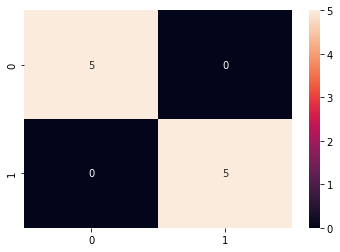

In [ ]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [ ]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
      orange       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Evaluasi Gaussian Naive Bayes Classifier

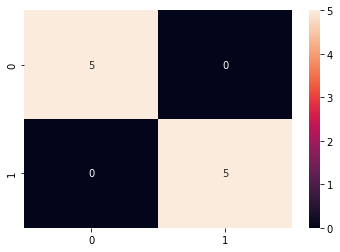

In [ ]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)

# true write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [ ]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
      orange       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Encoding Feature dari Dataset

In [ ]:
dict_Class = {
    'orange' : 2,
    'apple' : 1
}
dataset['Class'] = dataset['Class'].apply(lambda x : dict_Class[x])

feature_cols = ['Weight', 'Size']
X = dataset[feature_cols].values
y = dataset['Class'].values

dataset.head()

,Weight,Size,Class
0,69,4.39,2
1,69,4.21,2
2,65,4.09,2
3,72,5.85,1
4,67,4.70,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Scaling Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Generate Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Training Model

In [ ]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer = GaussianNB()

# train the model using the training sets
classifer.fit(X_train, y_train)

# predict the response for test dataset
y_pred = classifer.predict(X_test)

Cek Akurasi model

In [ ]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Evaluasi Model 

In [ ]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Confusion Matrix

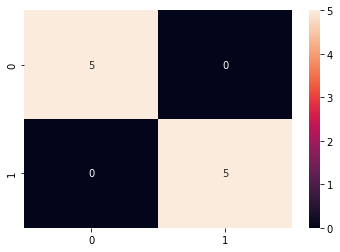

In [ ]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Classification score

In [ ]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

